<a href="https://colab.research.google.com/github/ashokraj21/HR_PROJECT/blob/main/Attrition_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a id="1"></a>
# <div style="padding:20px;color:white;margin:0;font-size:30px;font-family:Georgia;text-align:center;display:fill;border-radius:30px;background-color:#254E58;overflow:hidden"><b> Importing Libraries </b></div>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn import metrics
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from plotly.offline import iplot
from warnings import filterwarnings

filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<a id="1"></a>
# <div style="padding:20px;color:white;margin:0;font-size:30px;font-family:Georgia;text-align:center;display:fill;border-radius:30px;background-color:#254E58;overflow:hidden"><b> Loading Dataset </b></div>

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/DATAFORML.csv')

In [ ]:
df = pd.DataFrame(data)
df

,Age,Attrition,Employee ID,BusinessTravel,DailyRate,Department,Gender,DistanceFromHome,Education,EducationField,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,18,Yes,5101,0,230,Research & Development,Male,3,3,Life Sciences,...,3,80,0,0,2,3,0,0,0,0
1,18,No,5102,0,812,Sales,Male,10,3,Medical,...,1,80,0,0,2,3,0,0,0,0
2,18,Yes,5103,1,1306,Sales,Male,5,3,Marketing,...,4,80,0,0,3,3,0,0,0,0
3,19,Yes,5104,0,528,Sales,Male,22,1,Marketing,...,4,80,0,0,2,2,0,0,0,0
4,19,No,5105,0,1181,Research & Development,Male,3,1,Medical,...,4,80,0,1,3,3,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,30,No,5207,0,201,Research & Development,Female,5,3,Technical Degree,...,4,80,1,8,3,3,3,2,2,2
107,30,No,5208,0,1427,Research & Development,Female,2,1,Medical,...,4,80,0,6,3,3,5,3,1,2
108,30,No,5209,0,1339,Sales,Female,5,3,Life Sciences,...,3,80,1,12,2,3,10,9,7,4
109,30,Yes,5210,1,334,Sales,Female,26,4,Marketing,...,3,80,0,9,5,2,6,3,0,1



|STT | Attribute Name | Meaning |
|:---| :--- |:--- |
| 1 | Age | Employee's age |
| 2 | Gender | Employee's Gender |
| 3 | BusinessTravel | Frequency of employees' business trips |
| 4 | DailyRate | Daily salary rate for employees |
| 5 | Department | Office of employees |
| 6 | DistanceFromHome | Distance from home in miles to work |
| 7 | Education | Level of education achieved by staff |
| 8 | EducationField | Employee's field of study |
| 9 | EmployeeCount | Total number of employees in the organization |
| 10 | EmployeeNumber | A unique identifier for each employee record |
| 11 | EnvironmentSatisfaction | Employee satisfaction with their working environment |
| 12 | HourlyRate | Hourly rate for employees |
| 13 | JobInvolvement | Level of involvement required for the employee's job |
| 14 | JobLevel | Employee's level of work |
| 15 | JobRole | The role of employees in the organization |
| 16 | JobSatisfaction | Employee satisfaction with their work |
| 17 | MaritalStatus | Employee's marital status |
| 18 | MonthlyIncome | Employee's monthly income |
| 19 | MonthlyRate | Monthly salary rate for employees |
| 20 | NumCompaniesWorked | Number of companies the employee worked for |
| 21 | Over18 | Whether the employee is over 18 years old |
| 22 | OverTime | Do employees work overtime |
| 23 | PercentSalaryHike | Salary increase rate for employees |
| 24 | PerformanceRating | The performance rating of the employee |
| 25 | RelationshipSatisfaction | Employee satisfaction with their relationships |
| 26 | StandardHours | Standard working hours for employees |
| 27 | StockOptionLevel | Employee stock option level |
| 28 | TotalWorkingYears | Total number of years the employee has worked |
| 29 | TrainingTimesLastYear | Number of times employees were taken to training in the last year |
| 30 | WorkLifeBalance | Employees' perception of their work-life balance |
| 31 | YearsAtCompany | Number of years employees have been with the company |
| 32 | YearsInCurrentRole | Number of years the employee has been in their current role |
| 33 | YearsSinceLastPromotion | Number of years since employee's last promotion |
| 34 | YearsWithCurrManager | Number of years an employee has been with their current manager |
| 35 | Attrition | Does the employee leave the organization |

### meaning of classifications

- Education:
1 'Below College'
2 'College'
3 'Bachelor'
4 'Master'
5 'Doctor'

- EnvironmentSatisfaction:
1 'Low'
2 'Medium'
3 'High'
4 'Very High'

- JobInvolvement
1 'Low'
2 'Medium'
3 'High'
4 'Very High'

- JobSatisfaction:
1 'Low'
2 'Medium'
3 'High'
4 'Very High'

- PerformanceRating:
1 'Low'
2 'Good'
3 'Excellent'
4 'Outstanding'

- RelationshipSatisfaction:
1 'Low'
2 'Medium'
3 'High'
4 'Very High'

- WorkLifeBalance:
1 'Bad'
2 'Good'
3 'Better'
4 'Best'

<a id="1"></a>
# <div style="padding:20px;color:white;margin:0;font-size:30px;font-family:Georgia;text-align:center;display:fill;border-radius:30px;background-color:#254E58;overflow:hidden"><b> Data Discovery </b></div>

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111 entries, 0 to 110
Data columns (total 36 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       111 non-null    int64 
 1   Attrition                 111 non-null    object
 2   Employee ID               111 non-null    int64 
 3   BusinessTravel            111 non-null    int64 
 4   DailyRate                 111 non-null    int64 
 5   Department                111 non-null    object
 6   Gender                    111 non-null    object
 7   DistanceFromHome          111 non-null    int64 
 8   Education                 111 non-null    int64 
 9   EducationField            111 non-null    object
 10  EmployeeCount             111 non-null    int64 
 11  EmployeeNumber            111 non-null    int64 
 12  EnvironmentSatisfaction   111 non-null    int64 
 13  HourlyRate                111 non-null    int64 
 14  JobInvolvement            

<div style="border-radius:10px;border:#254E58 solid;padding: 15px;background-color:white;font-size:110%;text-align:left">
    
<h3 align="left"><font color=#254E58>💡 Inspiration:</font></h3>

- There are 35 columns and 1470 rows. This means we have 34 features, 1 target to investigate, and 1470 different person's information.
    
- The target is binary.
    
- Out of the 34 available features, 8 of them are in the form of objects and the rest are in the form of numbers.

In [ ]:
df1 = df.select_dtypes('object')
df1

,Attrition,Department,Gender,EducationField,JobRole,MaritalStatus,Over18,OverTime
0,Yes,Research & Development,Male,Life Sciences,Laboratory Technician,Single,Y,No
1,No,Sales,Male,Medical,Sales Representative,Single,Y,No
2,Yes,Sales,Male,Marketing,Sales Representative,Single,Y,Yes
3,Yes,Sales,Male,Marketing,Sales Representative,Single,Y,Yes
4,No,Research & Development,Male,Medical,Laboratory Technician,Single,Y,No
...,...,...,...,...,...,...,...,...
106,No,Research & Development,Female,Technical Degree,Research Scientist,Divorced,Y,No
107,No,Research & Development,Female,Medical,Laboratory Technician,Single,Y,No
108,No,Sales,Female,Life Sciences,Sales Executive,Married,Y,No
109,Yes,Sales,Female,Marketing,Sales Executive,Single,Y,No


In [ ]:
df2 = df.select_dtypes('int64')
df2

,Age,Employee ID,BusinessTravel,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,18,5101,0,230,3,3,1,405,3,54,...,3,80,0,0,2,3,0,0,0,0
1,18,5102,0,812,10,3,1,411,4,69,...,1,80,0,0,2,3,0,0,0,0
2,18,5103,1,1306,5,3,1,614,2,69,...,4,80,0,0,3,3,0,0,0,0
3,19,5104,0,528,22,1,1,167,4,50,...,4,80,0,0,2,2,0,0,0,0
4,19,5105,0,1181,3,1,1,201,2,79,...,4,80,0,1,3,3,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,30,5207,0,201,5,3,1,197,4,84,...,4,80,1,8,3,3,3,2,2,2
107,30,5208,0,1427,2,1,1,198,2,35,...,4,80,0,6,3,3,5,3,1,2
108,30,5209,0,1339,5,3,1,228,2,41,...,3,80,1,12,2,3,10,9,7,4
109,30,5210,1,334,26,4,1,299,3,52,...,3,80,0,9,5,2,6,3,0,1


In [ ]:
df1.describe().T

,count,unique,top,freq
Attrition,111,2,No,80
Department,111,3,Research & Development,72
Gender,111,2,Male,100
EducationField,111,6,Life Sciences,43
JobRole,111,8,Research Scientist,32
MaritalStatus,111,3,Single,45
Over18,111,1,Y,111
OverTime,111,2,No,82


<div style="border-radius:10px;border:#254E58 solid;padding: 15px;background-color:white;font-size:110%;text-align:left">
    
 *In the table above, we can see the number of unique values related to the features that are in the form of objects*

In [ ]:
df.describe(include='int64').T

,count,mean,std,min,25%,50%,75%,max
Age,111.0,25.918919,3.319735,18.0,24.0,26.0,29.0,30.0
Employee ID,111.0,5156.000000,32.186954,5101.0,5128.5,5156.0,5183.5,5211.0
BusinessTravel,111.0,0.189189,0.393435,0.0,0.0,0.0,0.0,1.0
DailyRate,111.0,889.054054,408.238073,103.0,558.0,896.0,1283.5,1479.0
DistanceFromHome,111.0,9.648649,8.585028,1.0,2.0,6.0,16.5,29.0
Education,111.0,2.450450,1.042189,1.0,1.5,3.0,3.0,5.0
EmployeeCount,111.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
EmployeeNumber,111.0,398.459459,232.616844,7.0,183.5,395.0,616.0,792.0
EnvironmentSatisfaction,111.0,2.603604,1.146372,1.0,1.5,3.0,4.0,4.0
HourlyRate,111.0,65.855856,19.270253,32.0,50.0,65.0,83.0,100.0


In [ ]:
#check for NaN values
df.isnull().sum()

Age                         0
Attrition                   0
Employee ID                 0
BusinessTravel              0
DailyRate                   0
Department                  0
Gender                      0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCur

In [ ]:
have_duplicate_rows = df.duplicated().any()
have_duplicate_rows

False

<div style="border-radius:10px;border:#254E58 solid;padding: 15px;background-color:white;font-size:110%;text-align:left">
    
**There is no missing value and duplicate rows in dataset.**
    
🧹Some of columns can be **removed**,  because their values do not affect the analysis results.

- Over18: All values are Y
- EmployeeCount: all values are 1.0
- StandardHours: all values are 80.0
- EmployeeNumber: is the id of the employee that their values do not affect the analysis results.

In [ ]:
# remove 4 columns
df = df.drop(['Over18', 'EmployeeNumber','EmployeeCount','StandardHours'],axis=1)

<a id="1"></a>
# <div style="padding:20px;color:white;margin:0;font-size:30px;font-family:Georgia;text-align:center;display:fill;border-radius:30px;background-color:#254E58;overflow:hidden"><b>Discovering Relationships in Data </b></div>

In [ ]:
# to separate categorical and numerical columns
cat = df.select_dtypes(['object']).columns
num = df.select_dtypes(['number']).columns
print(cat)
print(num)

Index(['Attrition', 'Department', 'Gender', 'EducationField', 'JobRole',
       'MaritalStatus', 'OverTime'],
      dtype='object')
Index(['Age', 'Employee ID', 'BusinessTravel', 'DailyRate', 'DistanceFromHome',
       'Education', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate',
       'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')


In [ ]:
for i in cat:
    print('Unique values of ', i, set(df[i]))

Unique values of  Attrition {'No', 'Yes'}
Unique values of  Department {'Human Resources', 'Research & Development', 'Sales'}
Unique values of  Gender {'Male', 'Female'}
Unique values of  EducationField {'Human Resources', 'Life Sciences', 'Technical Degree', 'Medical', 'Marketing', 'Other'}
Unique values of  JobRole {'Manufacturing Director', 'Research Director', 'Human Resources', 'Healthcare Representative', 'Laboratory Technician', 'Sales Executive', 'Research Scientist', 'Sales Representative'}
Unique values of  MaritalStatus {'Divorced', 'Married', 'Single'}
Unique values of  OverTime {'Yes', 'No'}


<div style="border-radius:10px;border:#254E58 solid;padding: 15px;background-color:white;font-size:110%;text-align:left">
<h3 align="left"><font color=#254E58>💡 Analysis of graphs</font></h3>  
    
- Attrition is the highest for both men and women from 18 to 35 years of age and gradually decreases.
- As income increases, attrition decreases.
- Attrition is much, much less in divorced women.
- Attrition is higher for employees who usually travel than others, and this rate is higher for women than for men.
- Attrition is the highest for those in level 1 jobs.
- Women with the job position of manager, research director and technician laboratory have almost no attrition.
- Men with the position of sales expert have a lot of attrition.

In [ ]:
df_copy = df.copy()

<div style="border-radius:10px;border:#254E58 solid;padding: 15px;background-color:white;font-size:110%;text-align:left">

There are high correlation between some features:
- monthlyincome & joblevel
- year in currentrol , year at company, year with current manager & year in current role

<a id="1"></a>
# <div style="padding:20px;color:white;margin:0;font-size:30px;font-family:Georgia;text-align:center;display:fill;border-radius:30px;background-color:#254E58;overflow:hidden"><b> Machine Learning Models </b></div>

In [ ]:
DF = df.copy()

In [ ]:
DF['BusinessTravel'] = DF['BusinessTravel'].replace('Travel_Rarely',2)
DF['BusinessTravel'] = DF['BusinessTravel'].replace('Travel_Frequently',3)
DF['BusinessTravel'] = DF['BusinessTravel'].replace('Non-Travel',4)

DF['Attrition'] = DF['Attrition'].replace('Yes',2)
DF['Attrition'] = DF['Attrition'].replace('No',3)

DF['OverTime'] = DF['OverTime'].replace('Yes',2)
DF['OverTime'] = DF['OverTime'].replace('No',3)

DF['Gender'] = DF['Gender'].replace('Male',2)
DF['Gender'] = DF['Gender'].replace('Female',3)

DF['MaritalStatus'] = DF['MaritalStatus'].replace('Single',2)
DF['MaritalStatus'] = DF['MaritalStatus'].replace('Married',3)
DF['MaritalStatus'] = DF['MaritalStatus'].replace('Divorced',4)

DF['Department'] = DF['Department'].replace('Sales',2)
DF['Department'] = DF['Department'].replace('Human Resources',3)
DF['Department'] = DF['Department'].replace('Research & Development',4)

DF['EducationField'] = DF['EducationField'].replace('Life Sciences',2)
DF['EducationField'] = DF['EducationField'].replace('Medical',3)
DF['EducationField'] = DF['EducationField'].replace('Marketing',4)
DF['EducationField'] = DF['EducationField'].replace('Technical Degree',2)
DF['EducationField'] = DF['EducationField'].replace('Human Resources',3)
DF['EducationField'] = DF['EducationField'].replace('Other',4)

DF['JobRole'] = DF['JobRole'].replace('Sales Executive',2)
DF['JobRole'] = DF['JobRole'].replace('Manufacturing Director',3)
DF['JobRole'] = DF['JobRole'].replace('Healthcare Representative',4)
DF['JobRole'] = DF['JobRole'].replace('Manager',2)
DF['JobRole'] = DF['JobRole'].replace('Research Director',3)
DF['JobRole'] = DF['JobRole'].replace('Laboratory Technician',4)
DF['JobRole'] = DF['JobRole'].replace('Sales Representative',2)
DF['JobRole'] = DF['JobRole'].replace('Research Scientist',3)
DF['JobRole'] = DF['JobRole'].replace('Human Resources',4)

In [ ]:
DF = DF.drop(['MonthlyIncome' ,'YearsInCurrentRole' , 'YearsAtCompany', 'YearsWithCurrManager'],axis=1)

In [ ]:
#normalizing
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler(feature_range = (0,1))
DF1 = DF.drop(columns=['Attrition'])
norm = scaler.fit_transform(DF)
norm_df = pd.DataFrame(norm,columns=DF.columns)

In [ ]:
X = pd.DataFrame(norm_df.drop(columns='Attrition'))
Y = pd.DataFrame(norm_df.Attrition).values.reshape(-1, 1)

In [ ]:
x_train  , x_test , y_train, y_test = train_test_split (X ,Y ,test_size = 0.2 , random_state = 0)

In [ ]:
#SMOTE
from imblearn.over_sampling import SMOTE
oversampler=SMOTE(random_state=0)
smote_train, smote_target = oversampler.fit_resample(x_train,y_train)


# 1. RandomForest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(smote_train, smote_target, test_size = 0.2, random_state = 42)

rfc = RandomForestClassifier()
rfc = rfc.fit(x_train, y_train)
y_pred = rfc.predict(x_test)

print ('accuracy',metrics.accuracy_score(y_test, y_pred))

accuracy 0.9259259259259259


In [ ]:
!pip install scikit-learn
import sklearn.metrics as metrics

In [ ]:
import sklearn

In [ ]:
print(sklearn.metrics.classification_report)

<function classification_report at 0x7b8653a72b00>


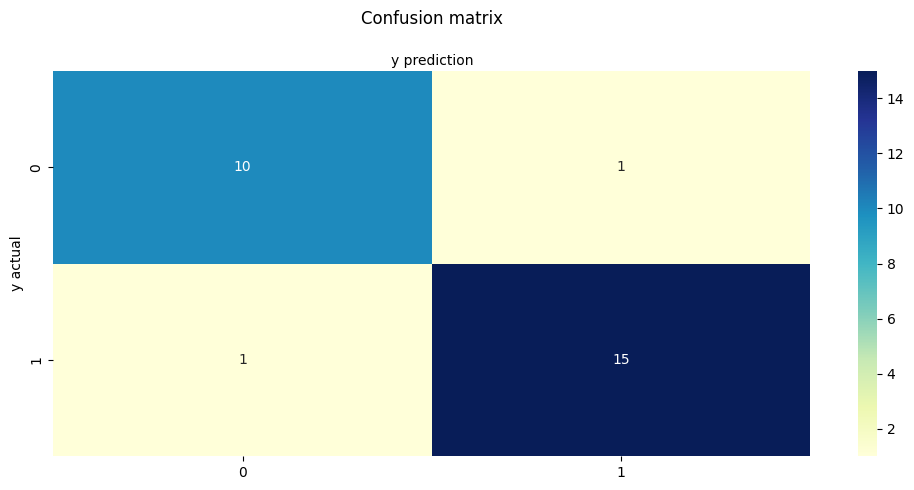

              precision    recall  f1-score   support

         0.0       0.91      0.91      0.91        11
         1.0       0.94      0.94      0.94        16

    accuracy                           0.93        27
   macro avg       0.92      0.92      0.92        27
weighted avg       0.93      0.93      0.93        27



In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
cm = metrics.confusion_matrix(y_test,y_pred)
sns.heatmap(metrics.confusion_matrix(y_test,y_pred),annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.xlabel('y prediction')
plt.ylabel('y actual')
plt.show()

print(sklearn.metrics.classification_report(y_test, y_pred))